<a href="https://colab.research.google.com/github/jaswanthreddyp4/ML_Lab/blob/main/pgm1_perfomance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

df=pd.read_csv('/content/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

input=df.drop(['salary_more_then_100k'],axis=1)
target=df['salary_more_then_100k']


In [ ]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [ ]:
input['company_enc']=le_company.fit_transform(input['company'])
input['job_enc']=le_company.fit_transform(input['job'])
input['degree_enc']=le_company.fit_transform(input['degree'])

In [ ]:
input

,company,job,degree,company_enc,job_enc,degree_enc
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs=input.drop(['company','job','degree'],axis=1)

In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [ ]:
model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.25

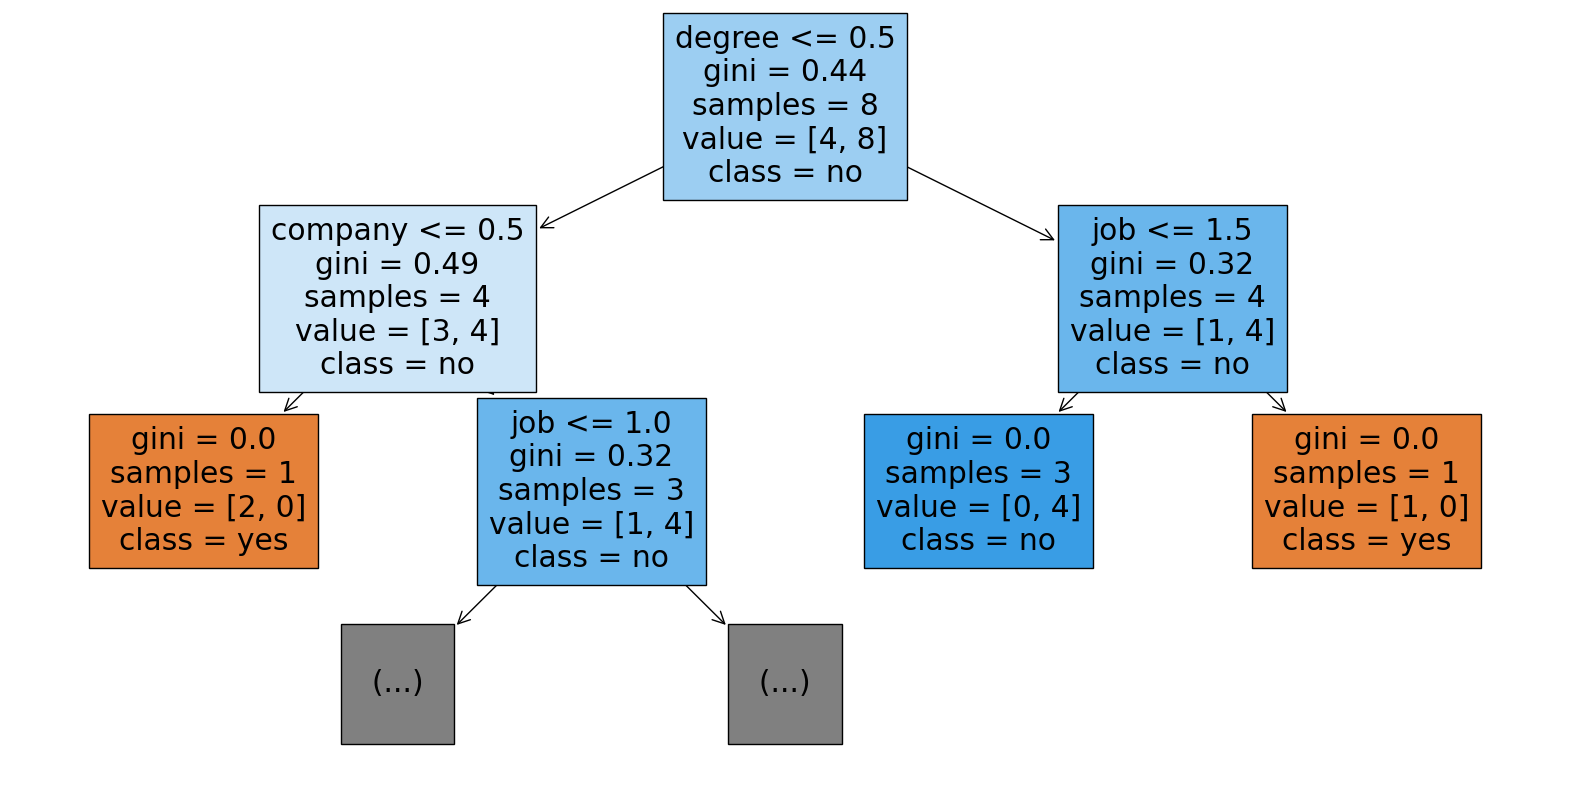

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree=model.estimators_[1]
plt.figure(figsize=(20,10))

plot_tree(tree,feature_names=input.columns,filled=True,class_names=['yes','no'],precision=2,max_depth=2)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def calculate_confusion_matrix_components(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return  TN, FP, FN, TP

TN, FP, FN, TP =calculate_confusion_matrix_components(y_test,y_pred)


In [ ]:
def calculate_metrics( TN, FP, FN, TP):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    return accuracy,precision,recall,f1_score,specificity

metrics=calculate_metrics( TN, FP, FN, TP)
metrics

(0.25, 0.5, 0.3333333333333333, 0.4, 0.0)

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.25
Precision: 0.5
Recall: 0.3333333333333333
F1 Score: 0.4
